# SoNNia Tutorial

import os
import sonia
from sonnia.sonnia import SoNNia
from sonnia.sonia import Sonia
from sonnia.plotting import Plotter
from sonnia.processing import Processing
import numpy as np
import pandas as pd

## Load lists of sequences with gene specification

In [2]:
# this assume data sequences are in semi-colon separated text file, with gene specification
data_seqs = pd.read_csv('data_seqs.csv.gz')

# preprocess data
processor=Processing(pgen_model='humanTRB')
filtered=processor.filter_dataframe(data_seqs)

data_seqs=filtered.values.astype(str)
print(len(data_seqs))
data_seqs[:3]

bad genes: 0
unproductive: 0
wrong bounds: 0
long cdr3s: 0
200000


array([['CASSKQGASEAFF', 'TRBV7-8', 'TRBJ1-1'],
       ['CASSPPPNYGYTF', 'TRBV6-1', 'TRBJ1-2'],
       ['CASSTDTTEAFF', 'TRBV6-5', 'TRBJ1-1']], dtype='<U26')

## Define and infer model

In [3]:
qm = SoNNia(data_seqs=data_seqs,pgen_model='humanTRB')

2024-07-11 11:11:17,269: Adding data seqs.
2024-07-11 11:11:17,445: Encode data seqs.


Metal device set to: Apple M3 Pro


100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [00:01<00:00, 106789.98it/s]


In [6]:
# add generated sequences (you can add them from file too)
qm.add_generated_seqs(int(5e5)) 

2024-07-11 10:30:37,058: Generating 500000 using the pgen model in /Users/giulioisac/Documents/GitHub/soNNia/sonnia/default_models/human_T_beta.
2024-07-11 10:30:41,514: Adding gen seqs.
2024-07-11 10:30:41,675: Encode gen seqs.
100%|█████████████████████████████████████████████████████████████████████████| 500000/500000 [00:05<00:00, 95594.01it/s]


In [7]:
#define and train model
qm.infer_selection(epochs=50,batch_size=int(5e3))

## Do some plotting

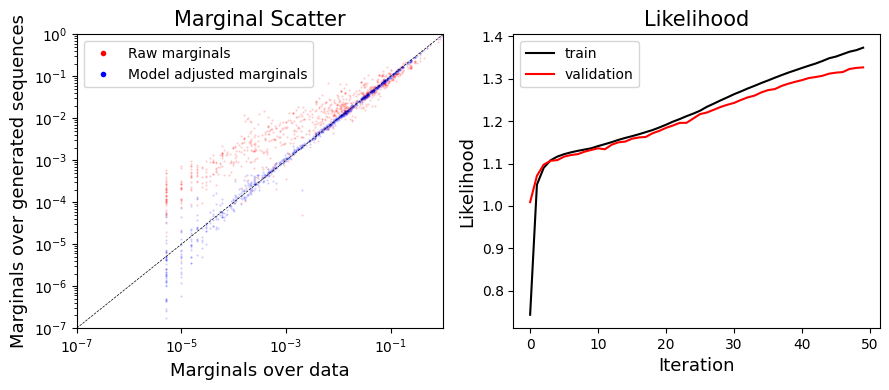

In [12]:
plot_sonia=Plotter(qm)
plot_sonia.plot_model_learning()

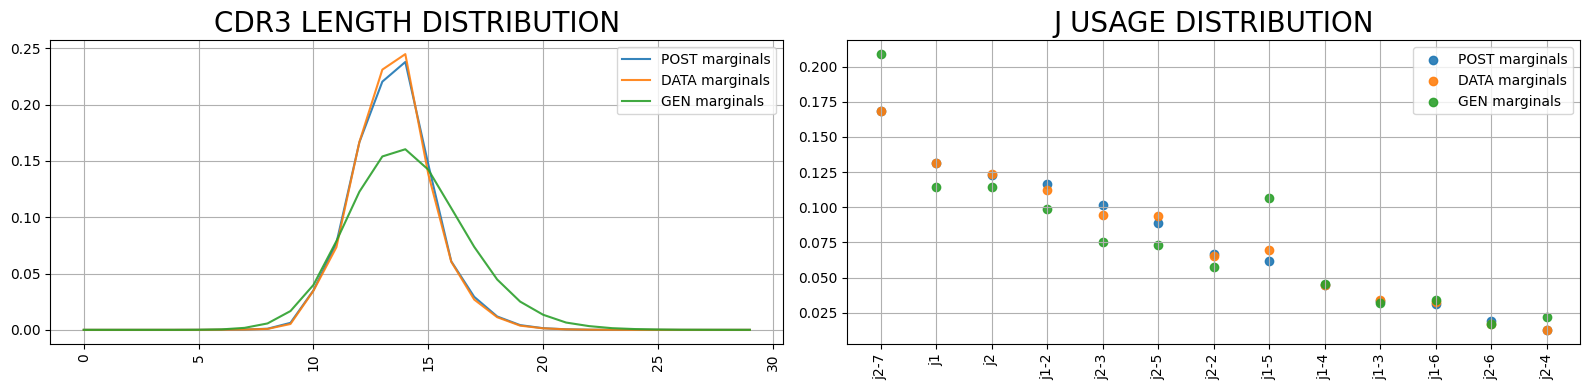

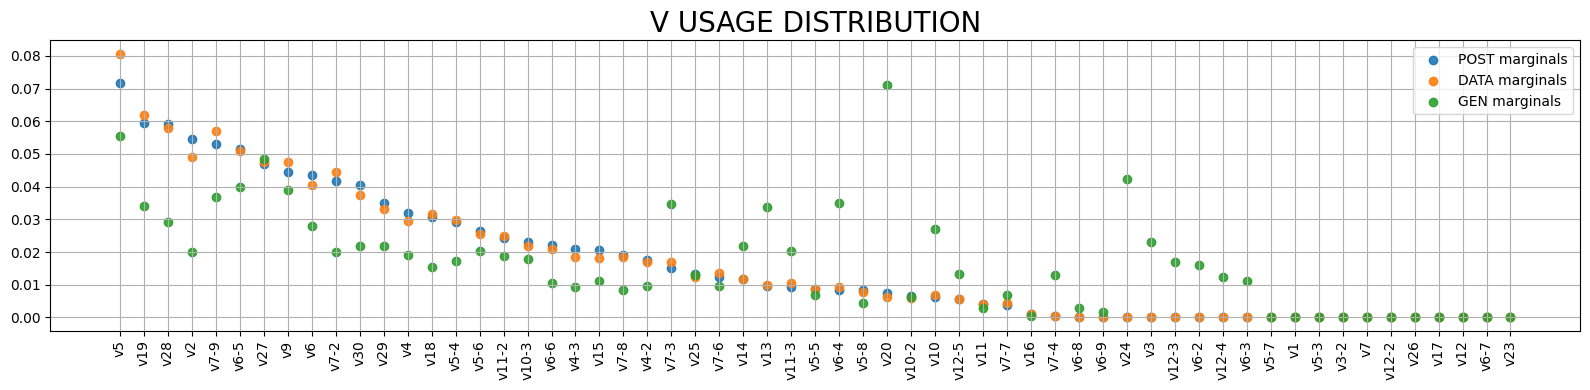

In [13]:
plot_sonia.plot_vjl()

## Generate sequences

In [14]:
pre_seqs=qm.generate_sequences_pre(int(1e4))
pre_seqs[:3]

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 25094.87it/s]


array([['CASSRGGYEQYF', 'TRBV3-1', 'TRBJ2-7'],
       ['CASSAAGGSSYEQYF', 'TRBV7-3', 'TRBJ2-7'],
       ['CASRASTGTVAEQYF', 'TRBV6-2', 'TRBJ2-7']], dtype='<U78')

In [15]:
post_seqs=qm.generate_sequences_post(int(1e4))
post_seqs[:3]

array([['CASRSGGSGNTIYF', 'TRBV6-5', 'TRBJ1-3'],
       ['CASSEGLADTQYF', 'TRBV6-1', 'TRBJ2-3'],
       ['CASKKVRTLEALEQFF', 'TRBV2', 'TRBJ2-1']], dtype='<U90')

## Evaluate sequences

In [16]:
Q_data,pgen_data,ppost_data=qm.evaluate_seqs(qm.data_seqs[:int(1e4)])
Q_gen,pgen_gen,ppost_gen=qm.evaluate_seqs(pre_seqs)
Q_model,pgen_model,ppost_model=qm.evaluate_seqs(post_seqs)
print(Q_model[:3]),
print(pgen_model[:3])
print(ppost_model[:3])

[6.6892633 3.1299226 0.6382268]
[3.36972355e-08 6.66253476e-08 3.53022869e-17]
[2.25409682e-07 2.08532183e-07 2.25308658e-17]


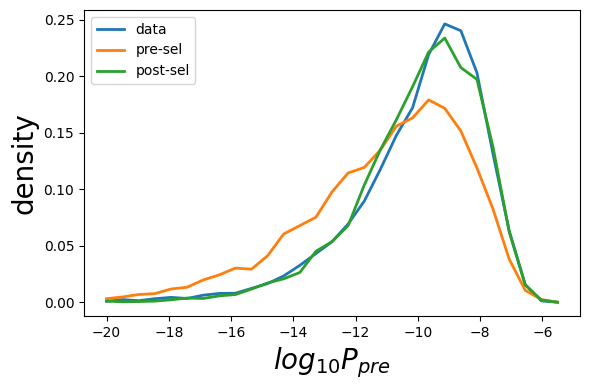

In [17]:
plot_sonia.plot_prob(data=pgen_data,gen=pgen_gen,model=pgen_model,ptype='P_{pre}')

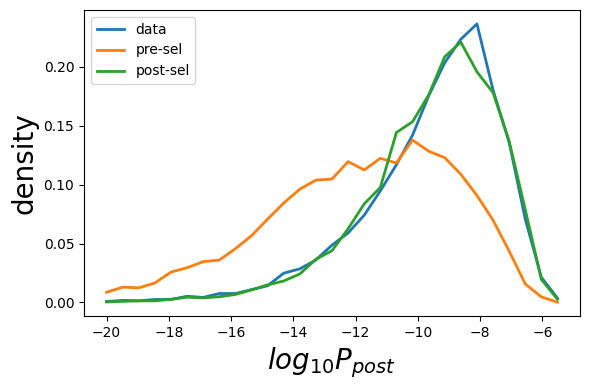

In [18]:
plot_sonia.plot_prob(ppost_data,ppost_gen,ppost_model,ptype='P_{post}')

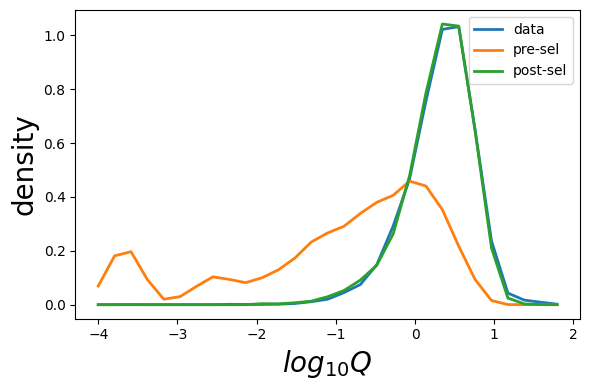

In [19]:
plot_sonia.plot_prob(Q_data,Q_gen,Q_model,ptype='Q',bin_min=-4,bin_max=2)

## Import some utils inherited from OLGA

In [20]:
# olga functionality can be directly accessed through the main SoNNia model

In [21]:
qm.seqgen_model.gen_rnd_prod_CDR3()

('TGCGCCAGCAGCCCCTCCCCGCGGGAAGGATGCAATCAGCCCCAGCATTTT',
 'CASSPSPREGCNQPQHF',
 45,
 4)

In [22]:
qm.genomic_data.genJ[1]

['TRBJ1-2*01',
 'CTAACTATGGCTACACCTTC',
 'CTAACTATGGCTACACCTTCGGTTCGGGGACCAGGTTAACCGTTGTAG']

In [23]:
qm.pgen_model.PinsDJ

array([6.17437e-02, 3.61889e-02, 9.09608e-02, 1.05828e-01, 1.37586e-01,
       1.14643e-01, 9.60481e-02, 8.14864e-02, 6.38634e-02, 4.92164e-02,
       3.93751e-02, 2.90524e-02, 2.30059e-02, 1.64381e-02, 1.45157e-02,
       1.13759e-02, 5.79127e-03, 5.97164e-03, 3.92779e-03, 2.96191e-03,
       2.04381e-03, 2.48417e-03, 9.09996e-04, 1.35102e-03, 2.44798e-04,
       4.52171e-04, 9.17052e-04, 6.28282e-04, 0.00000e+00, 1.41295e-05,
       9.74155e-04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])

## Save and Load Model

In [24]:
qm.save_model('test')

In [25]:
qm_new=SoNNia(ppost_model='test')

Cannot find data_seqs.tsv  --  no data seqs loaded.
Cannot find gen_seqs.tsv  --  no generated seqs loaded.


In [26]:
# By default sequences are not added. Adding them now.
qm_new.update_model(add_data_seqs=qm.data_seqs,add_gen_seqs=qm.gen_seqs)

2024-07-11 10:36:27,954: Adding data seqs.
2024-07-11 10:36:27,982: Using default index (0) for amino acid CDR3 sequences.
2024-07-11 10:36:27,983: Using default index (1) for V genes.
2024-07-11 10:36:27,983: Using default index (2) for J genes.
2024-07-11 10:36:28,032: 200000 sequences before filtering. Using test for filtering.
2024-07-11 10:36:28,045: 200000 sequences remain after removing sequences with V genes inconsistent with the model.
2024-07-11 10:36:28,054: 200000 sequences remain after removing sequences with J genes inconsistent with the model.
2024-07-11 10:36:28,095: 200000 sequences remain after removing data which are unproductive amino acid sequences.
2024-07-11 10:36:28,165: 200000 sequences remain after removing sequences that do not begin with a 'C' or end in a ['A', 'B', 'C', 'E', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'].
2024-07-11 10:36:28,200: 200000 sequences remain after removing sequences 

In [27]:
# Continue inference
qm_new.infer_selection(epochs=5)
qm_new.learning_history.history

{'loss': [-0.917634129524231,
  -0.9297581911087036,
  -0.9374640583992004,
  -0.9420860409736633,
  -0.9480760097503662],
 '_likelihood': [-0.9459818601608276,
  -0.9519134163856506,
  -0.9565053582191467,
  -0.9614313244819641,
  -0.965249240398407],
 'val_loss': [-0.9218994379043579,
  -0.9534543752670288,
  -0.9493811130523682,
  -0.9589893817901611,
  -0.9295039176940918],
 'val__likelihood': [-0.9583306312561035,
  -0.9630382657051086,
  -0.9619290232658386,
  -0.9621008634567261,
  -0.9700673818588257]}

## Compute Diversity and Distance from Reference Distribution

In [28]:
print('model entropy is: ', qm_new.entropy(), '[bits]')

model entropy is:  30.31072030773339 [bits]


In [29]:
print('Dkl post gen is: ', qm_new.dkl_post_gen(), '[bits]')

Dkl post gen is:  1.3313388 [bits]


## Load Default Sonia Models

In [30]:
# load beta model
beta_default_model=Sonia(ppost_model='humanTRB')

Cannot find data_seqs.tsv  --  no data seqs loaded.
Cannot find gen_seqs.tsv  --  no generated seqs loaded.
